In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data/data.csv')
data.head(5)

,Unnamed: 0,Survived,Sex,Age,SibSp,Parch,Fare,Pc_1,Pc_2,Pc_3,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,0,0,0,22.0,1,0,1.981001,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,4.266662,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,26.0,0,0,2.070022,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3,1,1,35.0,1,0,3.972177,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,35.0,0,0,2.085672,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
y = data['Survived']
X = data.drop(['Survived'], axis=1).values

classifiers = [AdaBoostClassifier(random_state=2), RandomForestClassifier(random_state=2)]

for clf in classifiers:
    score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print([np.mean(score)])

[0.7353336738168198]
[0.8047636477130858]


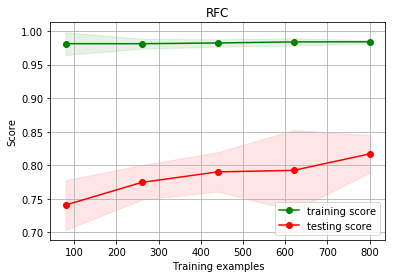

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=10, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='g')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g', label='training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='testing score')
    plt.legend(loc='best')
    
    return plt

g = plot_learning_curve(RandomForestClassifier(), 'RFC', X, y)

In [10]:
len(X[0])

51

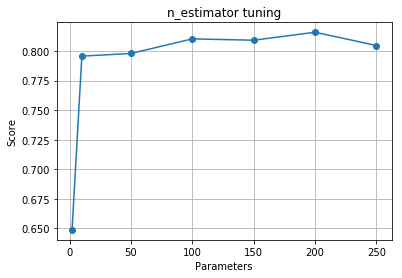

In [13]:
def para_tune(para, X, y):
    clf = RandomForestClassifier(n_estimators=para)
    score = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Parameters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    
    return plt


g = accurate_curve([2, 10, 50, 100, 150, 200, 250], X, y, 'n_estimator tuning')

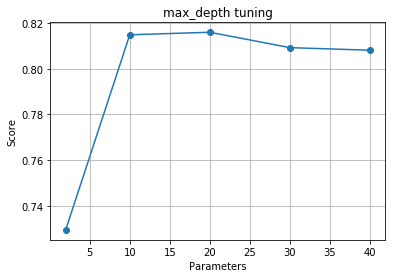

In [15]:
def para_tune(para, X, y):
    clf = RandomForestClassifier(n_estimators=300, max_depth=para)
    score = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Parameters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    
    return plt


g = accurate_curve([2, 10, 20, 30, 40], X, y, 'max_depth tuning')

In [17]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
para_grid = {'max_depth': [10], 'n_estimators': [100], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}#对以上参数进行网格搜索
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='accuracy')
gs.fit(X, y)
gs_best = gs.best_estimator_ #选择出最优的学习器
gs.best_score_ #最优学习器的精度

0.8159371492704826

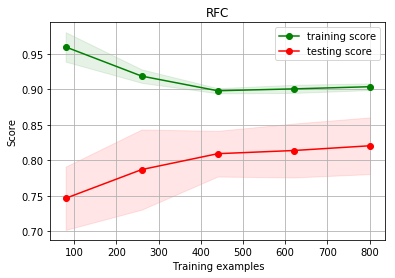

In [18]:
g = plot_learning_curve(gs_best, 'RFC', X, y)#调用实验2中定义的 plot_learning_curve 绘制学习曲线